In [4]:
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
import sys
import os
import math
# import matplotlib as plt
import os.path
import matplotlib.pyplot as plt
import operator
import numpy as np
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit

from scipy.optimize import leastsq
import astropy.io.fits as fits
import matplotlib.lines as lines

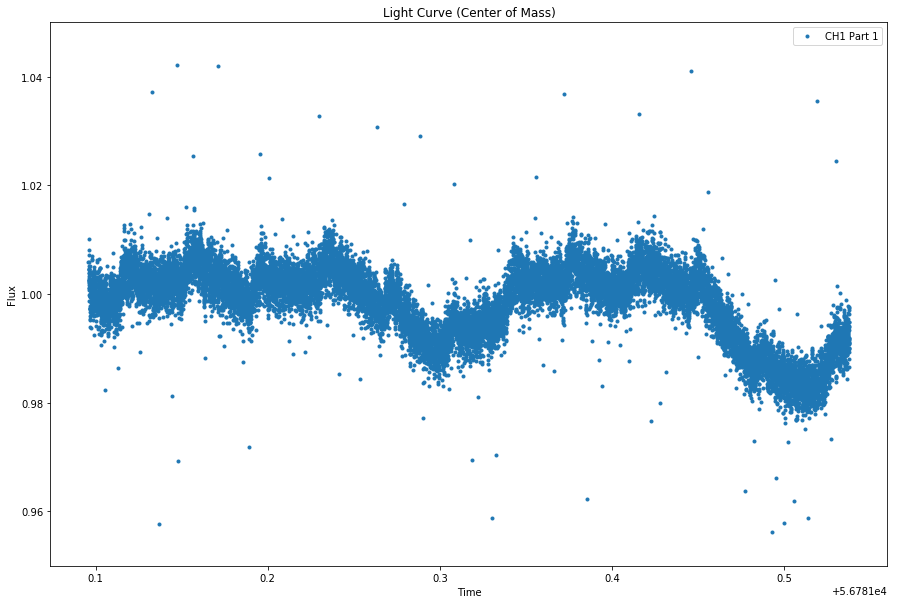

In [6]:
def median_flux(ap_ph):
    ap_ph_med = ap_ph/np.nanmedian(ap_ph)
    return ap_ph_med

def plot_ascii(dir_lightcurv,col_1,col_2,part_str):
    data = ascii.read(dir_lightcurv)
    ap_phot = data[col_1]
    bmjd = data[col_2]
    ap_phot = median_flux(ap_phot)
    plt.plot(bmjd,ap_phot,'.',label=part_str)


lightcurve_1='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt1/bcdfits_com_part_1.txt'
lightcurve_2='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt2/bcdfits_part_2.txt'
lightcurve_3='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt3/bcdfits_part_3.txt'
lightcurve_4='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt4/bcdfits_part_4.txt'
lightcurve_5='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt5/bcdfits_part_5.txt'
lightcurve_6_1='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt6-1/bcdfits_part_6-1.txt'
lightcurve_6_2='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt6-2/bcdfits_part_6-2.txt'
lightcurve_7='/Users/melaniapena/Rsrch/Luhman_16_Research/ap_phot_ascii_com/com_ap_ph_prt7/bcdfits_part_7.txt'


col_1='AperturePhot'
col_2='bmjd'
col_3='x_com_cen'
col_4='y_com_cen'

data_1 = ascii.read(lightcurve_1)
# data_2 = ascii.read(lightcurve_2)
# data_3 = ascii.read(lightcurve_3)
# data_4 = ascii.read(lightcurve_4)
# data_5 = ascii.read(lightcurve_5)
# data_6_1 = ascii.read(lightcurve_6_1)
# data_6_2 = ascii.read(lightcurve_6_2)
# data_7 = ascii.read(lightcurve_7)



ap_ph_1 = data_1[col_1]
bmjd_1 = data_1[col_2]
x_cen=data_1[col_3]
y_cen=data_1[col_4]


# ap_ph_2 = data_2[col_1]
# bmjd_2 = data_2[col_2]

# ap_ph_3 = data_3[col_1]
# bmjd_3 = data_3[col_2]

# ap_ph_4 = data_4[col_1]
# bmjd_4 = data_4[col_2]

# ap_ph_5 = data_5[col_1]
# bmjd_5 = data_5[col_2]

# ap_ph_6_1 = data_6_1[col_1]
# bmjd_6_1 = data_6_1[col_2]

# ap_ph_6_2 = data_6_2[col_1]
# bmjd_6_2 = data_6_2[col_2]

# ap_ph_7 = data_7[col_1]
# bmjd_7 = data_7[col_2]


ap_ph_1=median_flux(ap_ph_1)

# ap_ph_2=median_flux(ap_ph_2)
# ap_ph_3=median_flux(ap_ph_3)
# ap_ph_4=median_flux(ap_ph_4)
# ap_ph_5=median_flux(ap_ph_5)
# ap_ph_6_1=median_flux(ap_ph_6_1)
# ap_ph_6_2=median_flux(ap_ph_6_2)
# ap_ph_7=median_flux(ap_ph_7)

plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Light Curve (Center of Mass)')
plt.plot(bmjd_1,ap_ph_1,'.',label='CH1 Part 1')
# plt.plot(bmjd_2,ap_ph_2,'.',label='CH2 Part 2')
# plt.plot(bmjd_3,ap_ph_3,'.',label='CH1 Part 3')
# plt.plot(bmjd_4,ap_ph_4,'.',label='CH2 Part 4')
# plt.plot(bmjd_5,ap_ph_5,'.',label='CH2 Part 5')
# plt.plot(bmjd_6_1,ap_ph_6_1,'.',label='CH1 Part 6-1')
# plt.plot(bmjd_6_2,ap_ph_6_2,'.',label='CH1 Part 6-2')
# plt.plot(bmjd_7,ap_ph_7,'.',label='CH1 Part 7')

# plt.ylim([440000,465000])
plt.ylim([0.950,1.05])
# -----------------------------------------------------------
plt.legend(loc='upper right')

In [3]:
def clip_of_mask_flux(clip_flux):
    clip = sigma_clip(clip_flux, sigma=sigma_num, sigma_lower=None, sigma_upper=None, iters=5, cenfunc=np.ma.median, stdfunc=np.std, axis=None, copy=True)
    clipped = clip[np.logical_not(clip.mask)] - 1.
    return clipped

def clip_of_mask (clp_med_flux, x):
    clip = sigma_clip(clp_med_flux, sigma=sigma_num, sigma_lower=None, sigma_upper=None, iters=5, cenfunc=np.ma.median, stdfunc=np.std, axis=None, copy=True)
    clipped_x = x[np.logical_not(clip.mask)]
    return clipped_x    

/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/stats/sigma_clipping.py:165: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/anaconda3/envs/astroconda/lib/python3.5/site-packages/astropy/stats/sigma_clipping.py:166: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


Part 1 (Blue): 18851 18880
Part 2 (Orange): 17890 17920
Part 3 (Green): 9578 9600
Part 4 (Red): 17868 17920
Part 5 (Purple): 19153 19200
Part 6_1 (Brown): 9583 9600
Part 6_2 (Pink): 704 704
Part 7 (Grey): 17895 17920


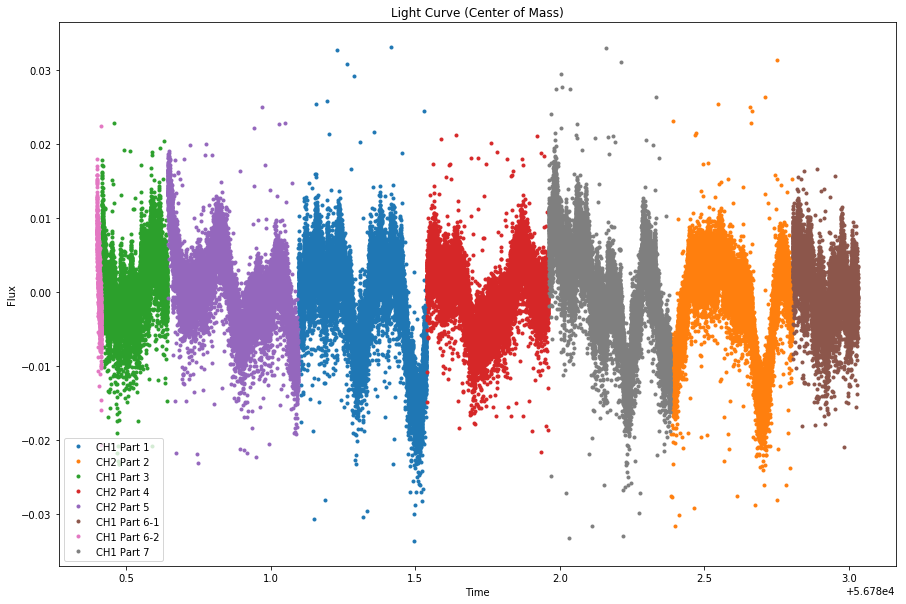

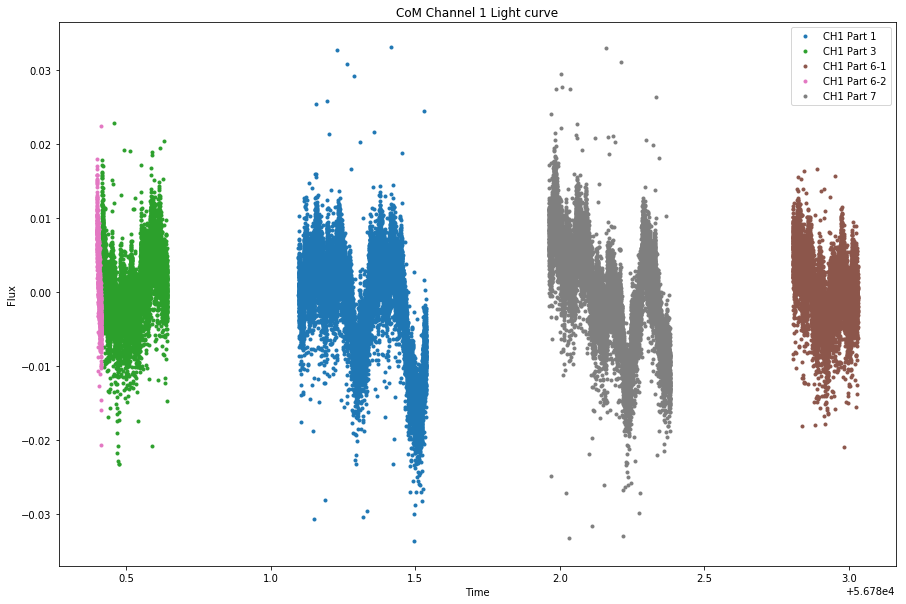

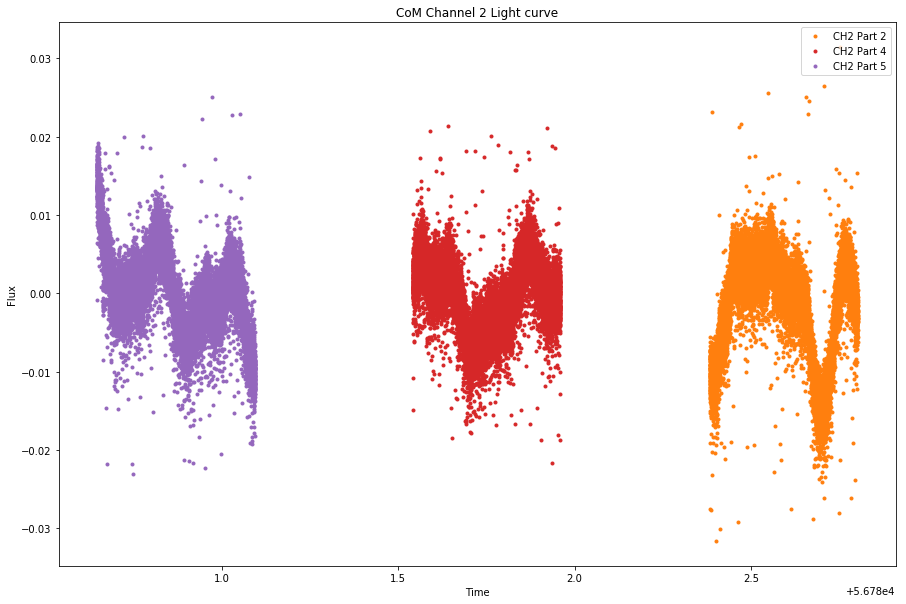

In [4]:
def clip_arr(data,time,sigma_num,label_nme,colorpnts):
#     Calls previous definition functions and plots them
#     This is to make the code more neater.
    clip_flux = clip_of_mask_flux(data)
    clip_time = clip_of_mask(data,time)
    plt.plot(clip_time,clip_flux,'.',label=label_nme,color=colorpnts,)
    return clip_flux,clip_time

##c_f:clipped flux of original aperture photometry array
##c_h:clipped time of the flux

sigma_num=5

plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Light Curve (Center of Mass)')

## Clips or masks the data within the array.
##  for both channel 1 and channel 2
c_f1,c_h1 = clip_arr(ap_ph_1,bmjd_1,sigma_num,'CH1 Part 1','tab:blue')
c_f2,c_h2 = clip_arr(ap_ph_2,bmjd_2,sigma_num,'CH2 Part 2','tab:orange')
c_f3,c_h3 = clip_arr(ap_ph_3,bmjd_3,sigma_num,'CH1 Part 3','tab:green')
c_f4,c_h4 = clip_arr(ap_ph_4,bmjd_4,sigma_num,'CH2 Part 4','tab:red')
c_f5,c_h5 = clip_arr(ap_ph_5,bmjd_5,sigma_num,'CH2 Part 5','tab:purple')
c_f6_1,c_h6_1 = clip_arr(ap_ph_6_1,bmjd_6_1,sigma_num,'CH1 Part 6-1','tab:brown')
c_f6_2,c_h6_2 = clip_arr(ap_ph_6_2,bmjd_6_2,sigma_num,'CH1 Part 6-2','tab:pink')
c_f7,c_h7 = clip_arr(ap_ph_7,bmjd_7,sigma_num,'CH1 Part 7','tab:grey')
plt.legend(loc='lower left')

## Printing out the length of clipped and whole array
print('Part 1 (Blue):',len(c_f1),len(ap_ph_1))
print('Part 2 (Orange):',len(c_f2),len(ap_ph_2))
print('Part 3 (Green):',len(c_f3),len(ap_ph_3))
print('Part 4 (Red):',len(c_f4),len(ap_ph_4))
print('Part 5 (Purple):',len(c_f5),len(ap_ph_5))
print('Part 6_1 (Brown):',len(c_f6_1),len(ap_ph_6_1))
print('Part 6_2 (Pink):',len(c_f6_2),len(ap_ph_6_2))
print('Part 7 (Grey):',len(c_f7),len(ap_ph_7))

## plots only Channel 1
plt.show()
plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('CoM Channel 1 Light curve')
c_f1,c_h1 = clip_arr(ap_ph_1,bmjd_1,sigma_num,'CH1 Part 1','tab:blue')
c_f3,c_h3 = clip_arr(ap_ph_3,bmjd_3,sigma_num,'CH1 Part 3','tab:green')
c_f6_1,c_h6_1 = clip_arr(ap_ph_6_1,bmjd_6_1,sigma_num,'CH1 Part 6-1','tab:brown')
c_f6_2,c_h6_2 = clip_arr(ap_ph_6_2,bmjd_6_2,sigma_num,'CH1 Part 6-2','tab:pink')
c_f7,c_h7 = clip_arr(ap_ph_7,bmjd_7,sigma_num,'CH1 Part 7','tab:grey')
plt.legend(loc='upper right')

## plots only Channel 2
plt.show()
plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('CoM Channel 2 Light curve')
c_f2,c_h2 = clip_arr(ap_ph_2,bmjd_2,sigma_num,'CH2 Part 2','tab:orange')
c_f4,c_h4 = clip_arr(ap_ph_4,bmjd_4,sigma_num,'CH2 Part 4','tab:red')
c_f5,c_h5 = clip_arr(ap_ph_5,bmjd_5,sigma_num,'CH2 Part 5','tab:purple')
plt.legend(loc='upper right')

In [5]:
def bin_funct(data_arr,nbin):
    data= data_arr.data
    bins=len(data)
    binned_data = [np.mean(data[i*nbin:i*nbin+nbin]) for i in range(1,bins//nbin+1)]
    return binned_data

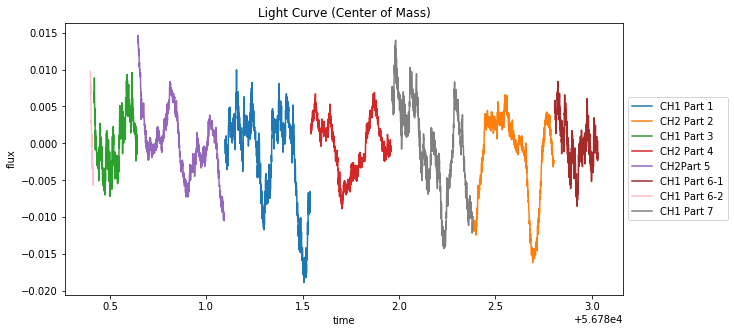

In [6]:
# # data = c_f1.data
nbin_num = 30

# # bins = len(data) //next this and the next lines of code are found within the def function create above.
# # binned_data = [np.mean(data[i*nbin:i*nbin+nbin]) for i in range(1,bins//nbin+1)]

bin_f1 = bin_funct(c_f1,nbin_num)
bin_h1 = bin_funct(c_h1,nbin_num)
bin_f2 = bin_funct(c_f2,nbin_num)
bin_h2 = bin_funct(c_h2,nbin_num)
bin_f3 = bin_funct(c_f3,nbin_num)
bin_h3 =bin_funct(c_h3,nbin_num)
bin_f4 = bin_funct(c_f4,nbin_num)
bin_h4 = bin_funct(c_h4,nbin_num)
bin_f5 = bin_funct(c_f5,nbin_num)
bin_h5 = bin_funct(c_h5,nbin_num)
bin_f6_1 = bin_funct(c_f6_1,nbin_num)
bin_h6_1 = bin_funct(c_h6_1,nbin_num)
bin_f6_2 = bin_funct(c_f6_2,nbin_num)
bin_h6_2 = bin_funct(c_h6_2,nbin_num)
bin_f7 = bin_funct(c_f7,nbin_num)
bin_h7 = bin_funct(c_h7,nbin_num)

plt.figure(figsize=(10,5))
plt.title('Light Curve (Center of Mass)')
plt.xlabel('time')
plt.ylabel('flux')

plt.plot(bin_h1,bin_f1,label='CH1 Part 1',color='tab:blue')
plt.plot(bin_h2,bin_f2,label='CH2 Part 2',color='tab:orange')
plt.plot(bin_h3,bin_f3,label='CH1 Part 3',color='tab:green')
plt.plot(bin_h4,bin_f4,label='CH2 Part 4',color='tab:red')
plt.plot(bin_h5,bin_f5,label='CH2Part 5',color='tab:purple')
plt.plot(bin_h6_1,bin_f6_1,label='CH1 Part 6-1',color='brown')
plt.plot(bin_h6_2,bin_f6_2,label='CH1 Part 6-2',color='pink')
plt.plot(bin_h7,bin_f7,label='CH1 Part 7',color='Grey')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ## plots only Channel 2
# plt.show()
# plt.figure(figsize=(10,5))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('CoM Channel 1 Light curve')
# plt.plot(bin_h1,bin_f1,label='Part 1',color='tab:blue')
# plt.plot(bin_h3,bin_f3,label='Part 3',color='tab:green')
# plt.plot(bin_h6_1,bin_f6_1,label='Part 6-1',color='brown')
# plt.plot(bin_h6_2,bin_f6_2,label='Part 6-2',color='pink')
# plt.plot(bin_h7,bin_f7,label='Part 7',color='Grey')

# ## plots only Channel 2
# plt.show()
# plt.figure(figsize=(10,5))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('CoM Channel 2 Light curve')
# plt.plot(bin_h2,bin_f2,color='tab:orange')
# plt.plot(bin_h4,bin_f4,color='tab:red')
# plt.plot(bin_h5,bin_f5,color='tab:purple')


In [7]:
### Two definitions for the IPSV and the Astrophysical model. 
def IPSV_Model(cen_arr,c0,c1,c2,c3,c4,c5):
    x=cen_arr[0,:]
    y=cen_arr[1,:]
    x_bar=np.mean(cen_arr[0,:])
    y_bar=np.mean(cen_arr[1,:])
    ipsv_model = c0+c1*(x-x_bar)+c2*(y-y_bar)+c3*(x-x_bar)**2+c4*(y-y_bar)**2+c5*(x-x_bar)*(y-y_bar)
    return ipsv_model
    
# These only focuses one mode at
def fourier_sinusoidal_series_twoModes(x,a0,a1,b1,a2,b2,freq,offset):
    fourier_model = a0*np.cos(2.*0*np.pi*freq*x) \
             + a1*np.cos(2.*1*np.pi*freq*x) \
             + b1*np.sin(2.*1*np.pi*freq*x) \
             + a2*np.cos(2.*2*np.pi*freq*x) \
             + b2*np.sin(2.*2*np.pi*freq*x) \
             + offset
    return fourier_model


def ipsv_fourier_m(xyt_arr,c0,c1,c2,c3,c4,c5,a0,a1,b1,a2,b2,freq,offset):
    x=xyt_arr[0,:]
    y=xyt_arr[1,:]
    t=xyt_arr[2,:]
    
    x_bar=np.mean(x)
    y_bar=np.mean(y)
    
    ipsv_m = c0+c1*(x-x_bar)+c2*(y-y_bar)+c3*(x-x_bar)**2+c4*(y-y_bar)**2+c5*(x-x_bar)*(y-y_bar)
    
    fourier_m = a0*np.cos(2.*0*np.pi*freq*t) \
             + a1*np.cos(2.*1*np.pi*freq*t) \
             + b1*np.sin(2.*1*np.pi*freq*t) \
             + a2*np.cos(2.*2*np.pi*freq*t) \
             + b2*np.sin(2.*2*np.pi*freq*t) \
             + offset
    model = ipsv_m * fourier_m
    return model


In [8]:
sigma_num=5


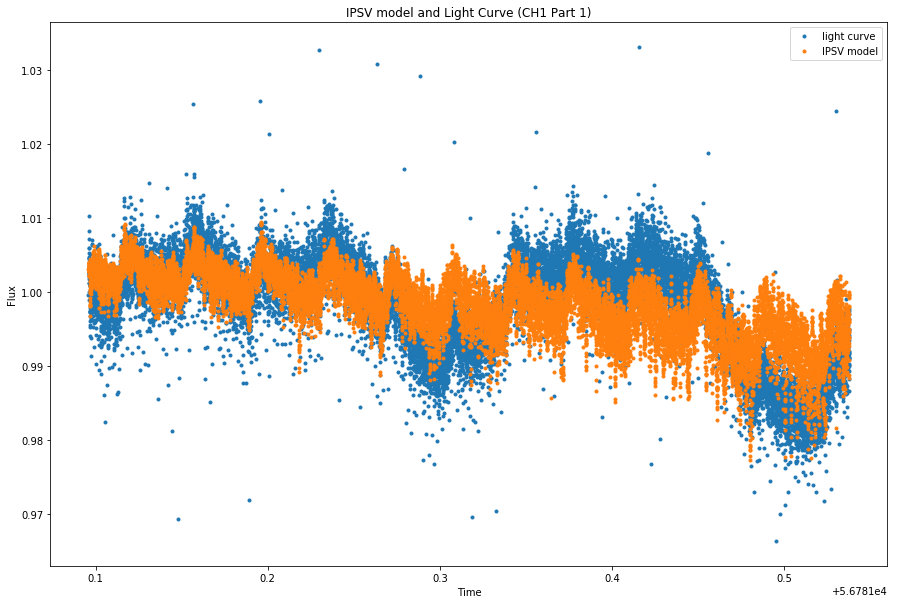

In [9]:
# --- curve fitting using a IPSV model only

c_f1 =clip_of_mask(ap_ph_1,ap_ph_1)
c_h1 = clip_of_mask(ap_ph_1,bmjd_1)
c_cenx = clip_of_mask(ap_ph_1,x_cen)
c_ceny = clip_of_mask(ap_ph_1,y_cen)

cen_arr=np.array([c_cenx,c_ceny]) ##creates a 2 col array
# # # so then 'cen_arr[col,row]' 1st Column: x_cen. 2nd Column: y_cen
# x_bar=np.mean(cen_arr[0,:]) ##not needed
# y_bar=np.mean(cen_arr[1,:])##not needed

ipsv_gp = [1,1,1,1,1,1]
params_ipsv, pcov = curve_fit(IPSV_Model,cen_arr,c_f1,p0=ipsv_gp) ##works

plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('IPSV model and Light Curve (CH1 Part 1)')

plt.plot(c_h1,c_f1,'.',label='light curve')
plt.plot(c_h1,IPSV_Model(cen_arr,*params_ipsv),'.',label='IPSV model')
plt.legend(loc='upper right')


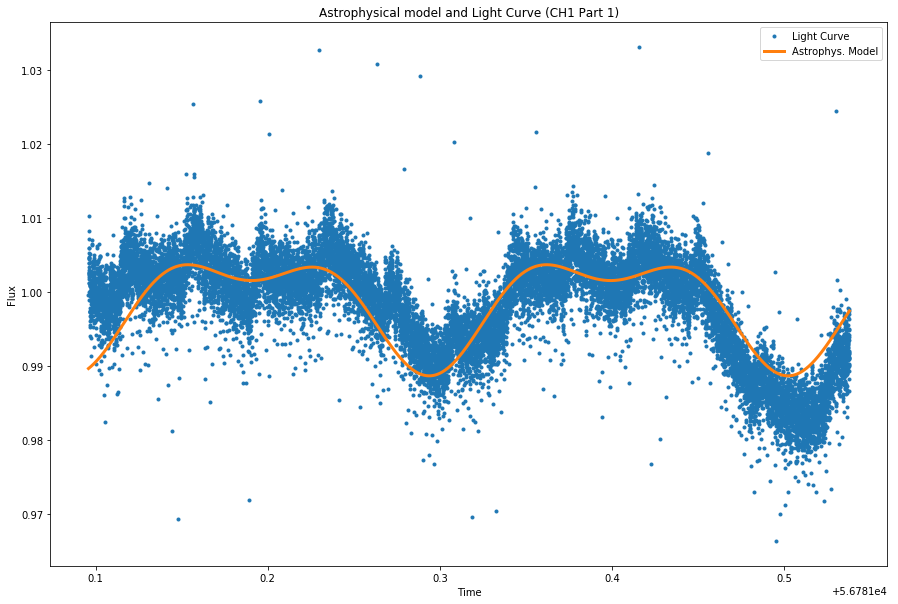

In [10]:
# --- Using model with Fourier series
c_f1 = clip_of_mask(ap_ph_1,ap_ph_1) ##Clipped flux data 
c_h1 = clip_of_mask(ap_ph_1,bmjd_1)  ##Clipped time data

## Guess Parameters.
f_gp = [1,.05,.05,.05,.05,1/(5/24),0]

## Adding the function into the curve fit.
params_f, pcov = curve_fit(fourier_sinusoidal_series_twoModes,c_h1,c_f1,p0=f_gp)


plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('Astrophysical model and Light Curve (CH1 Part 1)')
plt.plot(c_h1,c_f1,'.',label='Light Curve')
plt.plot(c_h1,fourier_sinusoidal_series_twoModes(c_h1,*params_f),label='Astrophys. Model',linewidth=3)
plt.legend(loc='upper right')


# test = c_f1 /(fourier_sinusoidal_series_twoModes(c_h1,*params_f)*IPSV_Model(cen_arr,*params_ipsv))
# plt.plot(c_h1,test,'.')


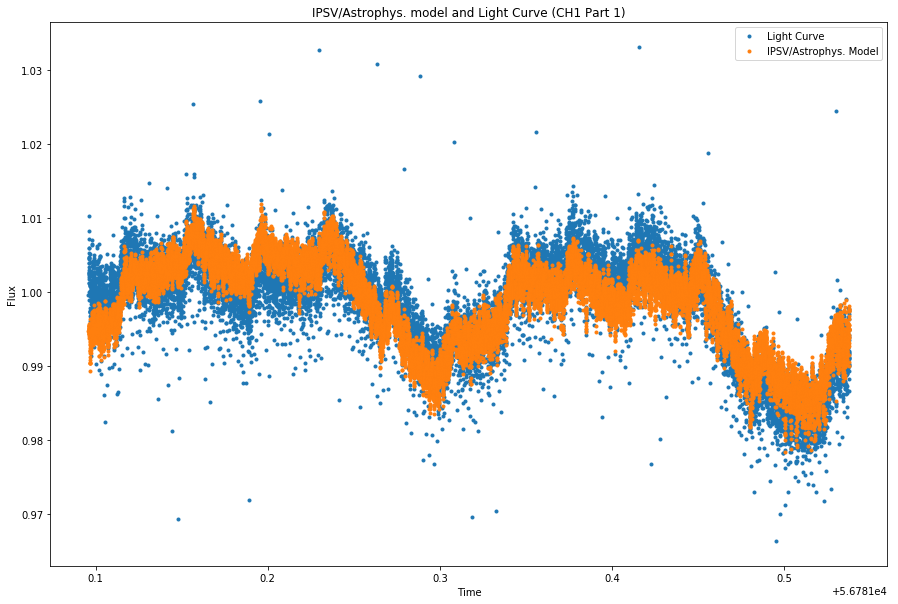

In [11]:
# --- Using model with both Fourier and IPSV models
sigma_num=5
c_f1 =clip_of_mask(ap_ph_1,ap_ph_1)
c_h1 = clip_of_mask(ap_ph_1,bmjd_1)
c_cenx = clip_of_mask(ap_ph_1,x_cen)
c_ceny = clip_of_mask(ap_ph_1,y_cen)

xyt_arr=np.array([c_cenx,c_ceny,c_h1])

ipsv_gp = [1,1,1,1,1,1]
f_gp = [1,.05,.05,.05,.05,1/(5/24),0]
gp=[];gp.extend(ipsv_gp);gp.extend(f_gp)
# print(len(gp))
params_all, pcov = curve_fit(ipsv_fourier_m,xyt_arr,c_f1,p0=gp) 

ipsv_mp = params_all[0:6]
f_mp = params_all[6:13]
# print(len(params))
# print(len(ipsv_mp))
# print(len(f_mp))

plt.figure(figsize=(15,10))
plt.ylabel('Flux')
plt.xlabel('Time')
plt.title('IPSV/Astrophys. model and Light Curve (CH1 Part 1)')
plt.plot(c_h1,c_f1,'.',label='Light Curve')
plt.plot(c_h1,ipsv_fourier_m(xyt_arr,*params_all),'.',label='IPSV/Astrophys. Model')
plt.legend(loc='upper right')



In [12]:
# test4 = c_f1/(ipsv_fourier_m(xyt_arr,*gp))

# ori_bin_flux =bin_funct(c_f1,20)
# testplt =bin_funct(test4,20)
# plt.title('original /w bin')
# plt.plot(ori_bin_flux,'.')
# plt.show()

# plt.title('original /w bin and ipsv/fourier')
# plt.plot(testplt)

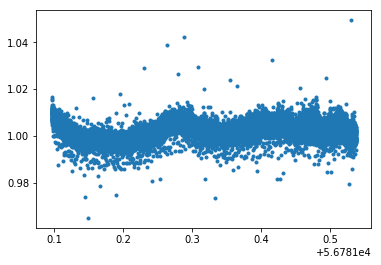

In [13]:
c_f1 =clip_of_mask(ap_ph_1,ap_ph_1)
c_h1 = clip_of_mask(ap_ph_1,bmjd_1)
c_cenx = clip_of_mask(ap_ph_1,x_cen)
c_ceny = clip_of_mask(ap_ph_1,y_cen)

cen_arr=np.array([c_cenx,c_ceny]) ##creates a 2 col array
# # # so then 'cen_arr[col,row]' 1st Column: x_cen. 2nd Column: y_cen

# params_ipsv, pcov = curve_fit(IPSV_Model,cen_arr,c_f1,p0=ipsv_mp) 
# test_ipsv = c_f1 /(IPSV_Model(cen_arr,*params_ipsv))
# plt.plot(test_ipsv,'.')
# plt.show()

# params_f, pcov = curve_fit(fourier_sinusoidal_series_twoModes,c_h1,c_f1,p0=f_mp) 
# test_f = c_f1 / (fourier_sinusoidal_series_twoModes(c_h1,*params_f))
# plt.plot(test_f,'.')
# plt.show()

## Guess parameters
ipsv_gp = [1,1,1,1,1,1]
f_gp = [1,.05,.05,.05,.05,1/(5/24),0]
gp=[];gp.extend(ipsv_gp);gp.extend(f_gp)
## Calculates the measured parameters using the curve fit and def function.
params_all, pcov = curve_fit(ipsv_fourier_m,xyt_arr,c_f1,p0=gp) 


##------------------------------------------------------------------
params_f, pcov = curve_fit(fourier_sinusoidal_series_twoModes,c_h1,c_f1,p0=f_gp)
params_ipsv, pcov = curve_fit(IPSV_Model,cen_arr,c_f1,p0=ipsv_gp)

### Example: Flux / (Astrophys. * IPSV)
flux_div_sumModels = c_f1 / (IPSV_Model(cen_arr,*params_ipsv) * fourier_sinusoidal_series_twoModes(c_h1,*params_f))
plt.plot(c_h1,flux_div_sumModels,'.')
##------------------------------------------------------------------



# plt.figure(figsize=(15,10))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title('Flux divided by the full model (CH1 Part 1)')

# flux_div_fullModel = c_f1 / (ipsv_fourier_m(xyt_arr,*params_all))
# plt.plot(c_h1,flux_div_fullModel,'.')
# plt.show()


# plt.figure(figsize=(15,10))
# plt.ylabel('Flux')
# plt.xlabel('Time')
# plt.title(' Residual of flux and full model(CH1 Part 1)')

# resid = (c_f1 - ipsv_fourier_m(xyt_arr,*params_all))
# plt.plot(c_h1,resid,'.')
# plt.show()

In [14]:
##-----
# test = c_f1 /(IPSV_Model(cen_arr,*params_ipsv))
# plt.plot(test,'.')
# plt.show()
# test2 =bin_funct(c_f1,11)
# fl_w_ipsv =bin_funct(test,11)

# print('all clipped')
# plt.title('original')
# plt.plot(c_h1,c_f1,'.',label='clipped')
# plt.show()
# plt.title('original /w bin')
# plt.plot(test2,'.')
# plt.show()
# plt.title('original w/ bin and ipsv model')
# plt.plot(fl_w_ipsv,'.')

# plt.show()
# plt.plot(c_f1,'.',label='clipped')
# plt.plot(IPSV_Model(cen_arr,*params_ipsv),'.')

In [137]:
# checks different modes within a fourier series.
def fourier_sinusoidal_series_2Terms(t, a0, a1, b1, a2, b2, freq, offset):
    return (
            + a0*np.sin(2.*0*np.pi*freq*t)
            + a1*np.sin(2.*1*np.pi*freq*t)
            + b1*np.cos(2.*1*np.pi*freq*t)
            + a2*np.sin(2.*2*np.pi*freq*t)
            + b2*np.cos(2.*2*np.pi*freq*t)
            + offset)
def fourier_sinusoidal_series_3Terms(t, a0, a1, b1, a2, b2, a3, b3, freq, offset):
    return (
            + a0*np.sin(2.*0*np.pi*freq*t)
            + a1*np.sin(2.*1*np.pi*freq*t)
            + b1*np.cos(2.*1*np.pi*freq*t)
            + a2*np.sin(2.*2*np.pi*freq*t)
            + b2*np.cos(2.*2*np.pi*freq*t)
            + a3*np.sin(2.*3*np.pi*freq*t)
            + b3*np.cos(2.*3*np.pi*freq*t)
            + offset)
def fourier_sinusoidal_series_fiveTerms(t, a0, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5, freq, offset):
    return (
            + a0*np.sin(2.*0*np.pi*freq*t)
            + a1*np.sin(2.*1*np.pi*freq*t)
            + b1*np.cos(2.*1*np.pi*freq*t)
            + a2*np.sin(2.*2*np.pi*freq*t)
            + b2*np.cos(2.*2*np.pi*freq*t)
            + a3*np.sin(2.*3*np.pi*freq*t)
            + b3*np.cos(2.*3*np.pi*freq*t)
            + a4*np.sin(2.*4*np.pi*freq*t)
            + b4*np.cos(2.*4*np.pi*freq*t)
            + a5*np.sin(2.*5*np.pi*freq*t)
            + b5*np.cos(2.*5*np.pi*freq*t)
            + offset)
def fourier_sinusoidal_series_7Terms(t, a0, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5, a6, b6, a7, b7, freq, offset):
    return (
            + a0*np.sin(2.*0*np.pi*freq*t)
            + a1*np.sin(2.*1*np.pi*freq*t)
            + b1*np.cos(2.*1*np.pi*freq*t)
            + a2*np.sin(2.*2*np.pi*freq*t)
            + b2*np.cos(2.*2*np.pi*freq*t)
            + a3*np.sin(2.*3*np.pi*freq*t)
            + b3*np.cos(2.*3*np.pi*freq*t)
            + a4*np.sin(2.*4*np.pi*freq*t)
            + b4*np.cos(2.*4*np.pi*freq*t)
            + a5*np.sin(2.*5*np.pi*freq*t)
            + b5*np.cos(2.*5*np.pi*freq*t)
            + a6*np.sin(2.*6*np.pi*freq*t)
            + b6*np.cos(2.*6*np.pi*freq*t)
            + a7*np.sin(2.*7*np.pi*freq*t)
            + b7*np.cos(2.*7*np.pi*freq*t)
            + offset)

def ipsv_fourier_mTerms(xyt_arr,c0,c1,c2,c3,c4,c5,a0,a1,b1,a2,b2,a3,b3,a4, b4, a5, b5, a6, b6, a7, b7,freq,offset):
    x=xyt_arr[0,:]
    y=xyt_arr[1,:]
    t=xyt_arr[2,:]
    
    x_bar=np.mean(x)
    y_bar=np.mean(y)
    
    ipsv_m = c0+c1*(x-x_bar)+c2*(y-y_bar)+c3*(x-x_bar)**2+c4*(y-y_bar)**2+c5*(x-x_bar)*(y-y_bar)
    
    fourier_m = a0*np.sin(2.*0*np.pi*freq*t)\
            + a1*np.sin(2.*1*np.pi*freq*t)\
            + b1*np.cos(2.*1*np.pi*freq*t)\
            + a2*np.sin(2.*2*np.pi*freq*t)\
            + b2*np.cos(2.*2*np.pi*freq*t)\
            + a3*np.sin(2.*3*np.pi*freq*t)\
            + b3*np.cos(2.*3*np.pi*freq*t)\
            + a4*np.sin(2.*4*np.pi*freq*t)\
            + b4*np.cos(2.*4*np.pi*freq*t)\
            + a5*np.sin(2.*5*np.pi*freq*t)\
            + b5*np.cos(2.*5*np.pi*freq*t)\
            + a6*np.sin(2.*6*np.pi*freq*t)\
            + b6*np.cos(2.*6*np.pi*freq*t)\
            + a7*np.sin(2.*7*np.pi*freq*t)\
            + b7*np.cos(2.*7*np.pi*freq*t)\
            + offset
    model = ipsv_m * fourier_m
    return model

In [146]:
f_gp = [1,.05,.05,.05,.05,1/(5/24),0]
params_f2, pcov = curve_fit(fourier_sinusoidal_series_2Terms,c_h1,c_f1,p0=f_gp)

f_gp = [1,.05,.05,.05,.05,.05,.05,1/(5/24),0]
params_f3, pcov = curve_fit(fourier_sinusoidal_series_3Terms,c_h1,c_f1,p0=f_gp)
# params_ipsv, pcov = curve_fit(IPSV_Model,cen_arr,c_f1,p0=ipsv_gp)

f_gp = [1,.05,.05,.05,.05,.05,.05,.05,.05,.05,.05,1/(5/24),0]
params_f5, pcov = curve_fit(fourier_sinusoidal_series_fiveTerms,c_h1,c_f1,p0=f_gp)

f_gp = [1,.05,.05,.05,.05,.05,.05,.05,.05,.05,.05,.05,.05,.05,.05,1/(5/24),0]
params_f7, pcov = curve_fit(fourier_sinusoidal_series_7Terms,c_h1,c_f1,p0=f_gp)

/anaconda3/envs/astroconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


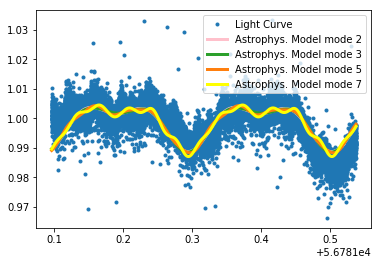

In [148]:
# plt.figure(figsize=(15,10))

plt.plot(c_h1,c_f1,'.',label='Light Curve')

plt.plot(c_h1,fourier_sinusoidal_series_2Terms(c_h1,*params_f2),label='Astrophys. Model mode 2',linewidth=3,color='pink')
plt.plot(c_h1,fourier_sinusoidal_series_3Terms(c_h1,*params_f3),label='Astrophys. Model mode 3',linewidth=3,color='tab:green')
plt.plot(c_h1,fourier_sinusoidal_series_fiveTerms(c_h1,*params_f5),label='Astrophys. Model mode 5',linewidth=3)
plt.plot(c_h1,fourier_sinusoidal_series_7Terms(c_h1,*params_f7),label='Astrophys. Model mode 7',linewidth=3,color='yellow')
plt.legend(loc='upper right')




In [103]:
# -------------------------------------------------------------------------------------------------------------
maxorder=2;nmodes=7

In [104]:
def choose_fourier_model(m):
    def fourier_model(x,*fp):
        fourier = fp[1]
        for i in range(m):
            n=i+1
            fourier = fourier + fp[2+i*2]*np.cos(2.*np.pi*n*x/fp[0]) + fp[3+i*2]*np.sin(2.*np.pi*n*x/fp[0])
        return(fourier)
    return(fourier_model)

In [127]:
# nmodes=2
nparams = 2+2*(nmodes)
print(nparams)
guess_fourier = np.zeros(nparams)
period_guess=5/24
offset_guess=1
guess_fourier[0] = period_guess
guess_fourier[1] = offset_guess
only_f_params, covar = curve_fit(choose_fourier_model(nmodes),c_h1,c_f1,p0=guess_fourier)

16


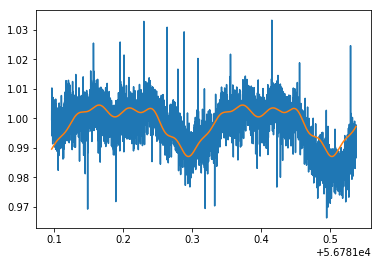

In [128]:
f_model = choose_fourier_model(nmodes)(c_h1,*only_f_params)
# print(len(only_f_params))
plt.plot(c_h1, c_f1)
plt.plot(c_h1, f_model)

In [110]:
def choose_ipsv(maxorder):
    def f_ipsv(xy_arr,*p):
        x=xy_arr[0,:]
        y=xy_arr[1,:]
        x_bar=np.mean(cen_arr[0,:])
        y_bar=np.mean(cen_arr[1,:])
        
        index_ipsv = 1
        ipsv = p[0]
        for i in range(maxorder):
            order=i+1
            loop_order=i+2
            for j in range(loop_order):
                ipsv=ipsv+p[index_ipsv]*(x-x_bar)**(order-j)*(y-y_bar)**(j)
                index_ipsv=index_ipsv+1
#         print(index_ipsv)
        return(ipsv)
    return(f_ipsv)

In [117]:
maxorder=2
n_ipsv=1
for i in range(maxorder):
    n_ipsv=n_ipsv +(i+2)
guess_ipsv = np.ones(n_ipsv) 
# print(n_ipsv)

xy_arr=np.array([c_cenx,c_ceny])

only_ipsv_params, covar = curve_fit(choose_ipsv(maxorder),xy_arr,c_f1,p0=guess_ipsv)

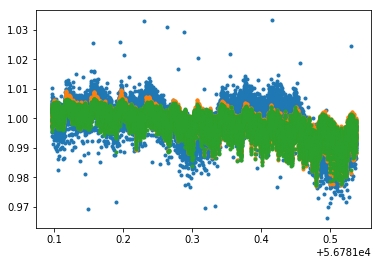

In [129]:
model_ipsv = choose_ipsv(maxorder)(cen_arr,*only_ipsv_params)
# plt.title('IPSV model and Light Curve (CH1 Part 1)')

# # plt.ylim(.97,1.015)
# plt.plot(c_h1,c_f1,'.',label='light curve')
plt.plot(c_h1,model_ipsv,'.',label='Max order '+str(maxorder)+', '+str(n_ipsv)+' params')

plt.plot(c_h1,ori_model,'.',label='Max order 2, 6 param') ## comparing with first ipsv model that only does maxorder of 2
# plt.legend(loc='upper right')



In [73]:
def choose_f_ipsv(nmodes,maxorder):
    def f_ipsv_model(xyt_arr,*p):
        x=xyt_arr[0,:]
        y=xyt_arr[1,:]
        xy = np.array([x,y])
        
        t=xyt_arr[2,:]
        
#       functions to find the number of parameters for each model.
        n_ipsv=1
        for i in range(maxorder):
            n_ipsv=n_ipsv +(i+2)    
        n_f = 2+2*(nmodes)
        
#       splitting up actual parameter ( p ) according to model (ipsv then fourier parameters)
        p_ipsv = p[0:n_ipsv]
        p_f = p[n_ipsv::]
        
        ipsv_model = choose_ipsv(maxorder)(xy,*p_ipsv)
        f_model = choose_fourier_model(nmodes)(t,*p_f)
        
        model = ipsv_model *f_model
        return(model)
    return(f_ipsv_model)

In [74]:
# maxorder=2;nmodes=2

In [77]:
# n_ipsv=1
# # Parameters of functions for ipsv and fourier
# for i in range(maxorder):
#     n_ipsv=n_ipsv +(i+2)
# guess_ipsv = np.zeros(n_ipsv) 
# print('Max order: ',n_ipsv) # ipsv parameters
# nparams = 2+2*(nmodes)
# print('Modes: ',nparams)# fourier parameters

# # adding specific guess parameters for fourier 
# guess_fourier = np.zeros(nparams)

# period_guess=5/24
# offset_guess=1
# guess_fourier[0] = period_guess
# guess_fourier[1] = offset_guess

# combining the two guess parameters together.

guess_ipsv_f = np.append(guess_ipsv,guess_fourier)
print(guess_ipsv_f)

[1.         1.         1.         1.         1.         1.
 0.20833333 1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [78]:
full_params, covar = curve_fit(choose_f_ipsv(nmodes,maxorder),xyt_arr,c_f1,p0=guess_ipsv_f)

In [79]:
model_final = choose_f_ipsv(nmodes,maxorder)(xyt_arr,*full_params)

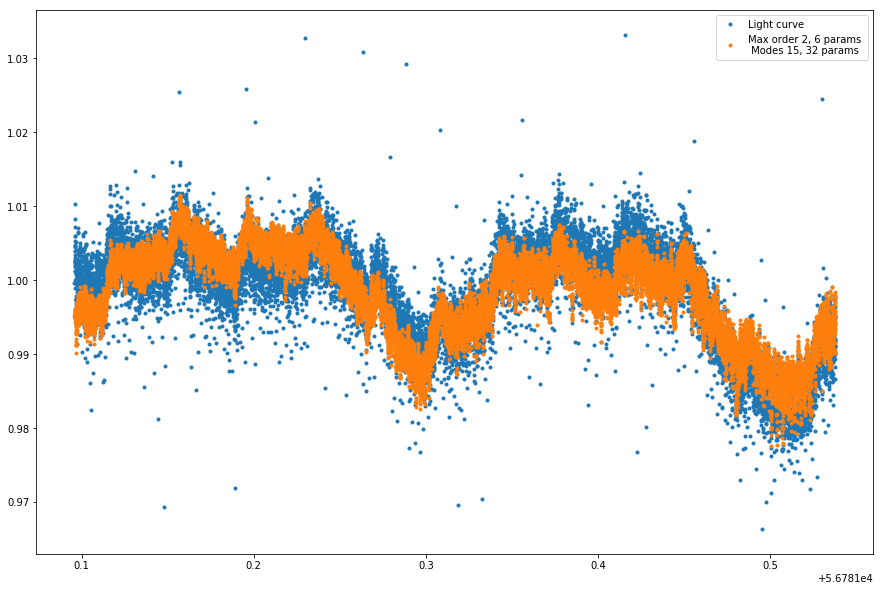

In [80]:
plt.figure(figsize=(15,10))
# plt.ylim(.97,1.015)
plt.plot(c_h1,c_f1,'.',label='Light curve')
plt.plot(c_h1,model_final,'.',label='Max order '+str(maxorder)+', '+str(n_ipsv)+' params \n Modes '+str(nmodes)+', '+str(nparams)+' params')
plt.legend(loc='upper right')


In [81]:
res = c_f1 - model_final
# plt.plot(res,'.')
# ##Example
# test_arr = [1,2,3,4,5]
# shift_test = np.roll(test_arr,1)
# # print(shift_test)

In [82]:
flux_roll = np.roll(c_f1,1)
diff = flux_roll - c_f1
f_stdev = np.std(diff) / np.sqrt(2)
f_stdev ## noise is for each data point 0.2%

0.0026015251399854507

In [83]:
def chi_sqrd(Model, Data, unc):
    two = 2
    chi_squared = sum(((Data - Model) ** two) / unc ** two)
    return chi_squared

chi_2 = chi_sqrd(model_final,c_f1,f_stdev)
print(chi_2)
print(len(c_f1))

chi_2/(len(c_f1))

30703.47184493096
18851


1.6287449920391999

In [100]:
fourier_params, covar = curve_fit(choose_fourier_model(nmodes),c_h1,c_f1,p0=guess_fourier)
p_ipsv, covar = curve_fit(choose_ipsv(maxorder),cen_arr,c_f1,p0=guess_ipsv)
full_params, covar = curve_fit(choose_f_ipsv(nmodes,maxorder),xyt_arr,c_f1,p0=guess_ipsv_f)



# getting the same parameters from the full model set
# this is to divide out the ipsv of the full model.
params_ipsv = full_params[0:n_ipsv]
params_f = full_params[n_ipsv::]


# model_ipsv = choose_ipsv(maxorder)(cen_arr,*params_ipsv)
# model_fourier = choose_fourier_model(nmodes)(c_h1,*params_f)


# # ipsv is divided out of the dull model only leaving the fourier model
# only_fourier_model = model_final/model_ipsv


# #### created from the definition that only uses the fourier model
# # plt.figure(figsize=(15,10))
# plt.plot(model_fourier,'-',label='fourier')
# # plt.plot(model_ipsv,'.',label='ipsv')
# # plt.plot(model_final,'.',label='Full model')
# plt.plot(only_fourier_model,'-',label = 'full model w/ ipsv divided out')
# # plt.legend(loc='upper right')
# # plt.show()


# # plt.figure(figsize=(15,10))
# # data_div_ipsv = c_f1 / model_ipsv
# # plt.plot(data_div_ipsv,'.',label = 'flux divided by ipsv')
# # plt.plot(only_fourier_model,label='fourier')
# # plt.legend(loc='upper right')


In [35]:
# plt.plot(model_ipsv*model_fourier,label='Independent def\n w/ full_model params \nmultiplied together')